In [2]:
import pandas as pd

In [ ]:
data = pd.read_csv("dataset/data.csv")
print(data.head())


                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singe

In [54]:
data = data.dropna()


In [55]:
data = data.sample(frac=1, random_state=42)
print(data.head())

                                                   URLs  \
1498  http://beforeitsnews.com/sports/2017/10/105-tr...   
2108  https://www.nytimes.com/2017/10/07/style/perso...   
1729  https://www.nytimes.com/2017/10/12/movies/the-...   
869   http://beforeitsnews.com/u-s-politics/2017/09/...   
3693  https://www.nytimes.com/2017/10/09/world/middl...   

                                               Headline  \
1498  10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...   
2108            Whatever Happened to Just Being Type A?   
1729  Review: In ‘The Departure,’ Watching Over Thos...   
869   Ellen DeGeneres Says She Will Never Host Presi...   
3693  Yemen’s War Turns Children Into Young Brides a...   

                                                   Body  Label  
1498  Red Flag Warning: These California Wildfires A...      0  
2108  Meanwhile, Ms. Rubin gestated her eighth book....      1  
1729  Photo\nSad, tender and quietly moving, “The De...      1  
869   Shahzaib Elahi\nContribu

In [22]:
print(data.head())
print(data.shape)

                                                   title  \
29396   Wingnut Pastor: The Pope Is ‘Confused,’ Shoul...   
30207   Colbert’s Merciless Mockery Of Oregon Militan...   
41906  LOL! The Woman Who Couldn’t Be Bothered With P...   
18068  Spain's PM says may use constitution to block ...   
19920  Trump to 'slap' foes, embrace friends in first...   

                                                    text    subject  \
29396  Donald Trump decided to war with the one perso...       News   
30207  The domestic terrorists currently occupying th...       News   
41906  Ironically, the two issues that catapulted Tru...  left-news   
18068  MADRID/BARCELONA (Reuters) - Spanish Prime Min...  worldnews   
19920  WASHINGTON (Reuters) - President Donald Trump ...  worldnews   

                      date  label  
29396    February 20, 2016      0  
30207     January 13, 2016      0  
41906          Jun 1, 2016      0  
18068     October 7, 2017       1  
19920  September 15, 2017       

In [56]:
data = data.dropna()
print(data.shape)

(3988, 4)


In [105]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

In [106]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
stop_words = set(stopwords.words('english'))


In [108]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # This removes all non-word characters (e.g., punctuation)
    
    # Tokenize, convert to lowercase, and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a string and return
    return " ".join(tokens)

In [109]:
data['Body'] = data['Body'].apply(preprocess_text)
print(data.head())

                                                   URLs  \
1498  http://beforeitsnews.com/sports/2017/10/105-tr...   
2108  https://www.nytimes.com/2017/10/07/style/perso...   
1729  https://www.nytimes.com/2017/10/12/movies/the-...   
869   http://beforeitsnews.com/u-s-politics/2017/09/...   
3693  https://www.nytimes.com/2017/10/09/world/middl...   

                                               Headline  \
1498  10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...   
2108            Whatever Happened to Just Being Type A?   
1729  Review: In ‘The Departure,’ Watching Over Thos...   
869   Ellen DeGeneres Says She Will Never Host Presi...   
3693  Yemen’s War Turns Children Into Young Brides a...   

                                                   Body  Label  
1498  red flag warning california wildfires among de...      0  
2108  meanwhile ms rubin gestated eighth book four t...      1  
1729  photo sad tender quietly moving departure neve...      1  
869   shahzaib elahi contribut

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(data['Body']).toarray()
y = data['Label']

print(X)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.02953937 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03034822 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier()
#model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9887218045112782
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       417
           1       0.98      1.00      0.99       381

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798



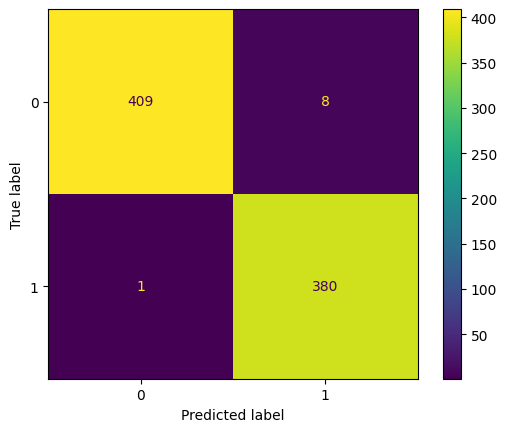

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [117]:
import joblib
joblib.dump(model, "fake_news_detector.pkl")


['fake_news_detector.pkl']

In [119]:
print(data['Label'].value_counts())


Label
0    2120
1    1868
Name: count, dtype: int64


In [45]:
from sklearn.metrics import classification_report

# Assuming y_true (actual labels) and y_pred (predicted labels) are available
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4653
           1       1.00      1.00      1.00      4327

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example classifier

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)  # X = features, y = labels
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.9887218  0.9887218  0.9887218  0.98870765 0.99121706]
Mean accuracy: 0.9892180262450354
